In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as skm
import math

import keras
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import *


In [2]:

data=pd.read_csv('NLP DATASET.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data.dropna(inplace=True)
data.isnull().sum()

password    0
strength    0
dtype: int64

In [4]:
password_tuple=np.array(data)
import random
random.shuffle(password_tuple)
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]
type(x)

list

In [5]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [6]:

word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

X=vectorizer.fit_transform(x)

type(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)
import tensorflow as tf
ann=tf.keras.models.Sequential()
X_train_ann=X_train.toarray()

In [8]:
ann.add(tf.keras.layers.Dense(units=300,activation='relu'))


In [9]:
ann.add(tf.keras.layers.Dense(units=300,activation='relu'))


In [10]:
ann.add(tf.keras.layers.Dense(units=3,activation=tf.keras.activations.softmax))


In [11]:
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics =['accuracy'])
history=ann.fit(X_train_ann,np.array(y_train), batch_size=37,verbose=1,epochs=16)


Epoch 1/16
13574/13574 [==============================] - 20s 1ms/step - loss: 0.2998 - accuracy: 0.8656
Epoch 2/16
13574/13574 [==============================] - 19s 1ms/step - loss: 0.1314 - accuracy: 0.9498
Epoch 3/16
13574/13574 [==============================] - 19s 1ms/step - loss: 0.0878 - accuracy: 0.9679
Epoch 4/16
13574/13574 [==============================] - 21s 2ms/step - loss: 0.0669 - accuracy: 0.9759
Epoch 5/16
13574/13574 [==============================] - 18s 1ms/step - loss: 0.0544 - accuracy: 0.9808
Epoch 6/16
13574/13574 [==============================] - 18s 1ms/step - loss: 0.0460 - accuracy: 0.9836 0s - loss: 0.0459 - accuracy: 0.
Epoch 7/16
13574/13574 [==============================] - 18s 1ms/step - loss: 0.0401 - accuracy: 0.9859
Epoch 8/16
13574/13574 [==============================] - 17s 1ms/step - loss: 0.0354 - accuracy: 0.9876 1s - loss: 0.0355 - accu
Epoch 9/16
13574/13574 [==============================] - 18s 1ms/step - loss: 0.0314 - accuracy: 0.98

In [12]:
dt=np.array(['a21r312d'])
pred=vectorizer.transform(dt)
#pre=vectorizer.fit_transform(dt)
print(pred.toarray().shape)

sample=ann.predict(pred.toarray())
sample.shape
print(np.argmax(sample))


(1, 125)
1


In [13]:
print(sample)

[[4.0561215e-10 1.0000000e+00 6.8410055e-09]]


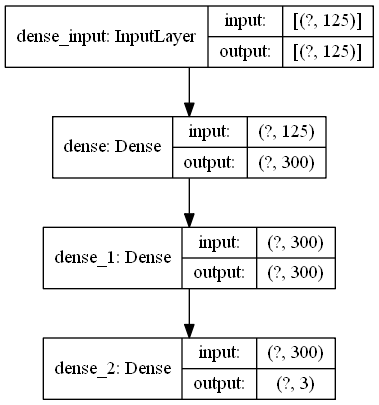

In [14]:
from keras.utils import plot_model, model_to_dot
plot_model(ann, to_file='mlp.png',show_shapes=True,expand_nested=True)


In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


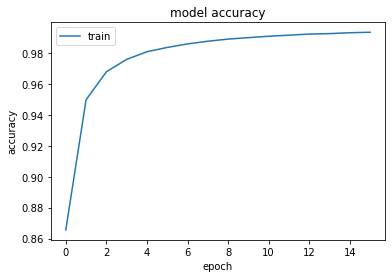

In [16]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

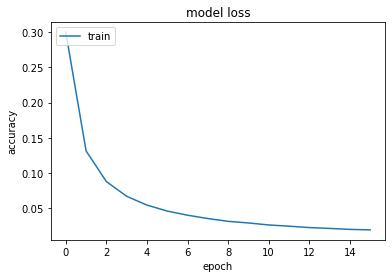

In [17]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

5232/5232 [==============================] - 4s 742us/step
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
5232/5232 [==============================] - 3s 663us/step
Accuracy: 0.990610
Precision:  [0.98313264 0.99301267 0.98417447]
Recall:  [0.97530312 0.99440231 0.98436444]
F1 score:  [0.97920223 0.993707   0.98426945]
ROC AUC: 0.999104
[[ 21799    550      2]
 [   370 123641    326]
 [     4    320  20398]]


<AxesSubplot:>

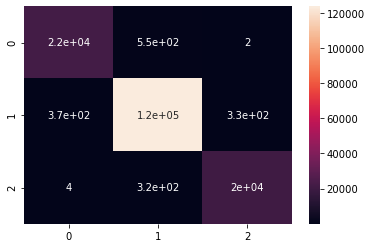

In [18]:

# predict probabilities for test set
yhat_probs = ann.predict(X_test.toarray(), verbose=1)
# predict crisp classes for test set
yhat_classes = ann.predict_classes(X_test.toarray(), verbose=1)

 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,average=None)
print('Precision: ',  precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,average=None)
print('Recall: ', recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average=None)
print('F1 score: ',  f1)
 

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs,average='macro',multi_class='ovr')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)
sns.heatmap(matrix , annot = True)


In [ ]:
proba=ann.predict_proba(X_test.toarray())
proba
from sklearn.metrics import log_loss
log_loss(y_test,proba)


Instructions for updating:
Please use `model.predict()` instead.


In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = ann.predict_proba(X_test.toarray()).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [ ]:
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_test,yhat_probs).numpy()

In [ ]:
from sklearn.metrics import (
    roc_auc_score,
    plot_roc_curve,
)
from yellowbrick.classifier import ROCAUC

roc_graph_MLP=ROCAUC(ann,classes=[0,1,2])
roc_graph_MLP.fit(X_train,y_train)
roc_graph_MLP.score(X_test,y_test)
roc_graph_MLP.show()

In [ ]:
precision_recall_curve(y_test,proba)

In [ ]:
fpr = dict()
tpr = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  proba[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()